In [5]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_preparation as dp
import source.regression_models as modl
data = dp.prepare_data(uselog=True)


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [2]:
r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_oos(data, variables=("vp","impvar","vrp","lzrt","ogap","wtexas","sntm","skvw","tail",
    "fbm","dtoy","dtoat","ygap","rdsp","rsvix","tchi","avgcor","shtint",
    "disag","ntis","lty","ltr","tms","dfy","dfr","infl","equity_premium", "d/p", "d/y", "e/p", "d/e", "svar", "b/m"), start_oos="1965-01-01", ct_cutoff =True, quiet =True, model_name="OLS(d/p)", ci= 0.5)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, y_lower=y_lower,y_upper=y_upper, dates=dates_o,
    title=f"OLS(d/p) OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"OLS (All Features) OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)





KeyboardInterrupt: 

In [ ]:
r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_oos(data, variables=("ogap",), start_oos="1965-01-01", ct_cutoff =True, quiet =True, model_name="OLS(d/p)", ci= 0.5)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, y_lower=y_lower,y_upper=y_upper, dates=dates_o,
    title=f"OLS(d/p) OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"OLS (OGAP) OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)





percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.002086435542834275
evaluate_oos calculated R2 CT: 0.002086435542834275
Manually calculated Stats: {'mean': 0.0020959899293244407, 'std': 0.0020792657217744235, 'lower': -0.0018230124088626453, 'upper': 0.005968917733891493}
evaluate_oos calculated R2 WCT: 0.002086435542834275
Stats WCT: {'mean': 0.002286774090574587, 'std': 0.002269435204252927, 'lower': -0.0020748538085116064, 'upper': 0.006686126800065012}


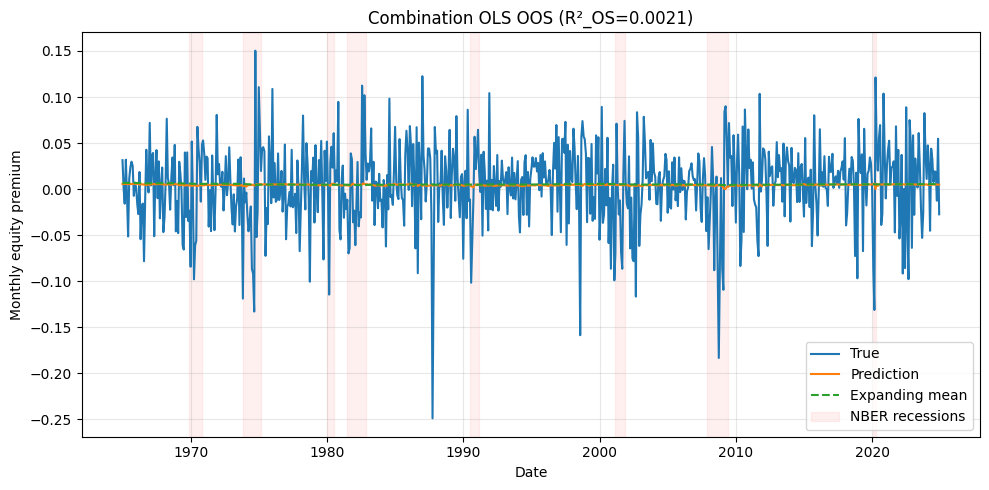

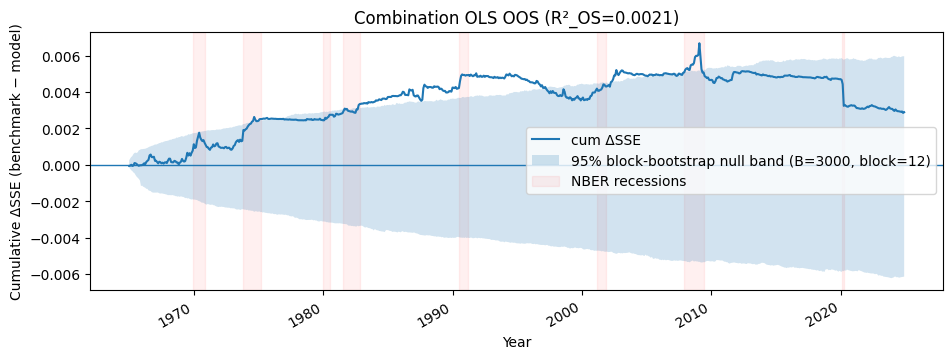

In [6]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables=("vp", "impvar", "vrp", "lzrt", 
    #"ogap", 
    "wtexas", 
    #"sntm", 
    "ndrbl", 
    "skvw", "tail", 
    #"fbm",
    "dtoy", "dtoat", "ygap", "rdsp", 
    #"rsvix", 
    #"tchi", 
    "avgcor", 
    #"shtint",
    "disag", "ntis", "tbl", "d/p", "d/y", 
    "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
    ), start_oos="1965-01-01", ct_cutoff =True, quiet =True, model_name="OLS(d/p)", combo="mean",
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables=("vp","impvar","vrp","lzrt","ogap","wtexas","sntm","skvw","tail",
    "fbm","dtoy","dtoat","ygap","rdsp","rsvix","tchi","avgcor","shtint",
    "disag","ntis","lty","ltr","tms","dfy","dfr","infl","equity_premium", "d/p", "d/y", "e/p", "d/e", "svar", "b/m",
    'ndrbl', 'tbl'# added just now
    ), start_oos="1965-01-01", ct_cutoff =True, quiet =True, model_name="OLS(d/p)", combo="mean",
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

In [ ]:
# Pick the monthly variables you actually have in `data`:
monthly_vars = [
    "vp","impvar","vrp","lzrt","ogap","wtexas","sntm","ndrbL","skvw","tail",
    "fbm","dtoy","dtoat","ygap","rdsp","rsvix","tchi","avgcor","shtint",
    "disag","ntis","tby","lty","ltr","tms","dfy","dfr","infl","equity_premium", "d/p", "d/y", "e/p", "d/e", "svar", "b/m"
]
monthly_vars = [v for v in monthly_vars if v in data.columns]

ranking = modl.rank_monthly_predictors(
    data,
    monthly_vars=monthly_vars,
    start_date="1927-01-01",
    start_oos="1965-01-01",
    lag=1,
    quiet=True,  # set False to see printed ranking
      ct_cutoff=True,
)


In [ ]:
r2_arima, stats_arima, y_true_a, y_pred_a, dates_a, _,_,Ha_arima = modl.autoarima_oos(
    data,
    target_col="equity_premium",
    start_oos="1965-01-01",
    seasonal=False,
    m=1,
    auto_arima_kwargs={"d": 0, "stationary": True},
    quiet=True,
    ct_cutoff=True,
    mode="mean",
)
modl.plot_oos(
    y_true_a, y_pred_a, Ha_arima, dates=dates_a,
    title=f"Autoarima OOS (R²_OS={r2_arima:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_a, y_pred_a, Ha_arima,
    dates=dates_a,
    title=f"Combination OLS OOS (R²_OS={r2_arima:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

In [ ]:

r2_c, stats_c, y_true_c, y_pred_c, dates_c, y_lower, y_upper, HA_c = modl.chronos_oos(
    data, start_oos="1965-01-01", quiet=True, ct_cutoff=True, freq='M', mode="mean", ci=0.8
)
modl.plot_oos(
    y_true_c, y_pred_c, HA_c, dates=dates_c, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-Bolt OOS (R²_OS={r2_c:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_c, y_pred_c, HA_c,
    dates=dates_c,
    title=f"Chronos Bolt OOS (R²_OS={r2_c:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

`torch_dtype` is deprecated! Use `dtype` instead!
`torch_dtype` is deprecated! Use `dtype` instead!
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.003839509284945586
evaluate_oos calculated R2 CT: 0.003839509284945586
Manually calculated Stats: {'mean': 0.015220458469937036, 'std': 0.02104007359520613, 'lower': -0.021147368773331558, 'upper': 0.061967491162376036}
evaluate_oos calculated R2 WCT: 0.003839509284945586
Stats WCT: {'mean': 0.014247051146864979, 'std': 0.02180014734287412, 'lower': -0.024353854166668437, 'upper': 0.059187550707330595}


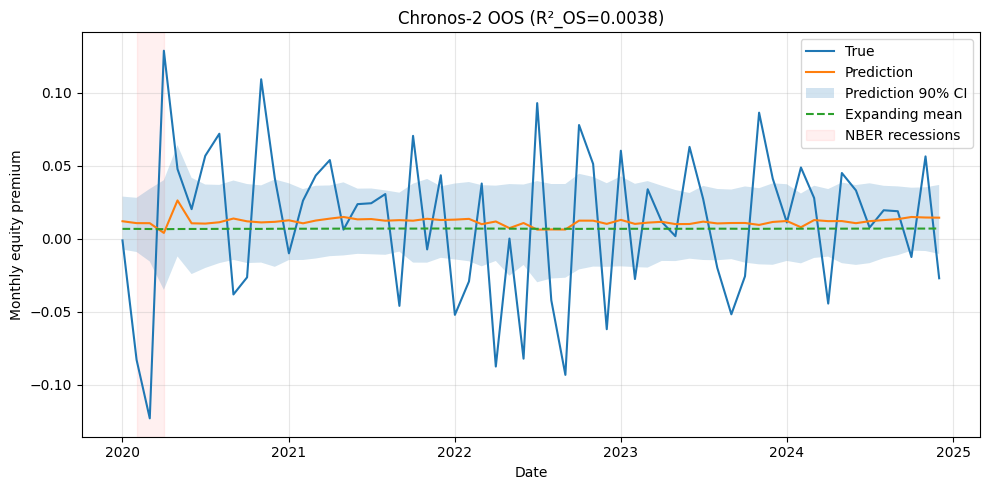

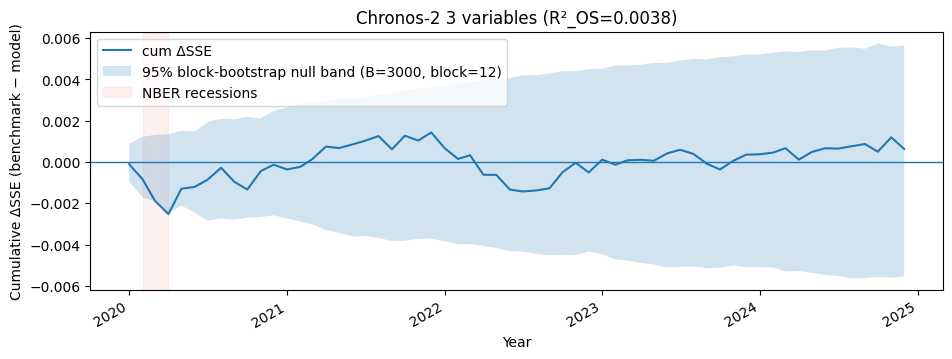

In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower,y_upper,HA_m = modl.chronos2_oos(
    data, covariates=(
 "d/p","tms","ogap"
    ), start_oos="1965-01-01",
    ctx_min=240, ct_cutoff=True, quiet=True, mode = "mean", freq="M",
    ci = 0.5
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 3 variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [7]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=(
    "vp", "impvar", "vrp", "lzrt", "ogap", "wtexas", "sntm", "ndrbl", 
    "skvw", "tail", "fbm", "dtoy", "dtoat", "ygap", "rdsp", "rsvix", 
    "tchi", "avgcor", "shtint", "disag", "ntis", "tbl", "d/p", "d/y", 
    "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
    ), start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M"
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 all variables OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


KeyboardInterrupt: 

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 23.06%
Manually calculated R2: 0.00877110612118126
evaluate_oos calculated R2 CT: 0.00877110612118126
Manually calculated Stats: {'mean': 0.0091047098201851, 'std': 0.009761927596442621, 'lower': -0.011053947713329538, 'upper': 0.028359944472371033}
evaluate_oos calculated R2 WCT: -0.00803158367520651
Stats WCT: {'mean': -0.007523839735261349, 'std': 0.02041898879230678, 'lower': -0.049118421395202186, 'upper': 0.03204954210434956}


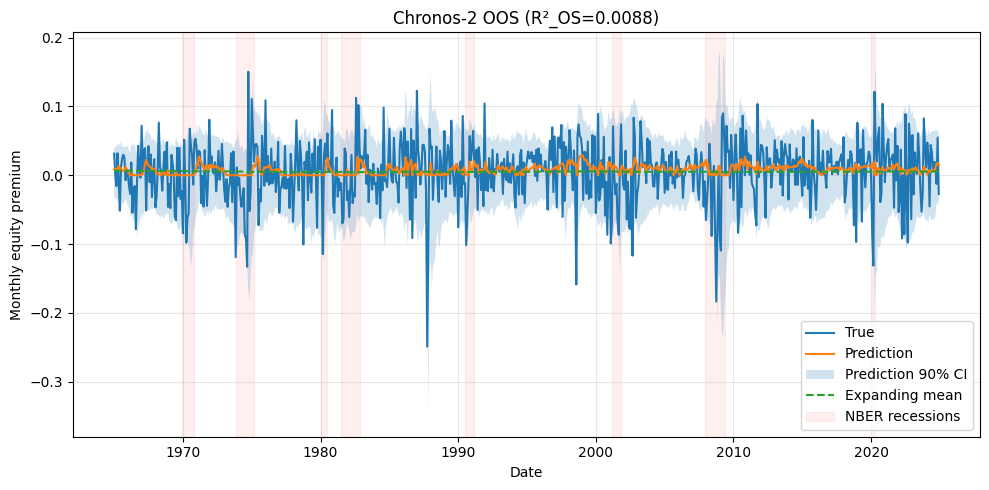

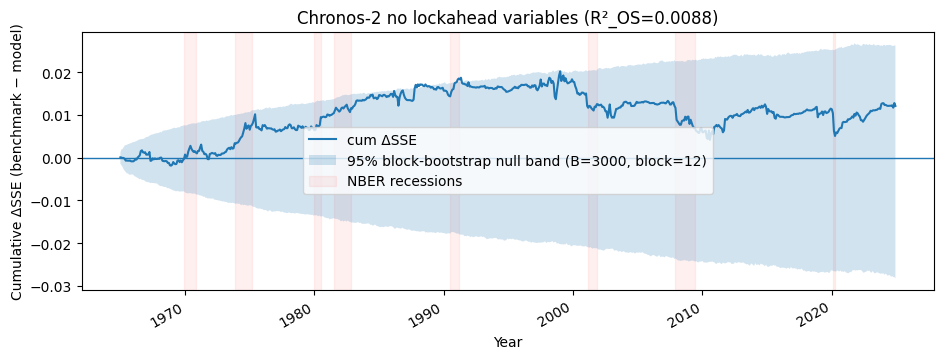

In [8]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=(
    "vp", "impvar", "vrp", "lzrt", 
    #"ogap", 
    "wtexas", 
    #"sntm", 
    "ndrbl", 
    "skvw", "tail", 
    #"fbm",
    "dtoy", "dtoat", "ygap", "rdsp", 
    #"rsvix", 
    #"tchi", 
    "avgcor", 
    #"shtint",
    "disag", "ntis", "tbl", "d/p", "d/y", 
    "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
    ), start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M"
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 no lockahead variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M"
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 Autoregressive OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
vars_gw = ['d/p','d/y','e/p','tms','dfy','dfr','tbl','ltr','infl','svar','b/m','ntis','cay']
vars_core = ['d/p','e/p','tms','dfy','tbl','ltr','infl','svar','cay']

xgb_params = dict(
    n_estimators=1200, max_depth=2, learning_rate=0.01,
    subsample=0.7, colsample_bytree=0.7, reg_lambda=2.0,
    objective="reg:squarederror", random_state=42
)
r2_t, stats, y_true_t, y_pred_t, dates_t,_,_, HA_t = modl.tree_ensemble_oos(data,start_oos="1965-01-01", variables=["vp","impvar","vrp","lzrt","ogap","wtexas","sntm","skvw","tail",
    "fbm","dtoy","dtoat","ygap","rdsp","rsvix","tchi","avgcor","shtint",
    "disag","ntis","lty","ltr","tms","dfy","dfr","infl"], ct_cutoff=True,quiet=True, model_params=xgb_params, mode = "mean")

    
modl.plot_oos(
    y_true_t, y_pred_t, HA_t, dates=dates_t,
    title=f"Tree Ensemble OOS (R²_OS={r2_t:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_t, y_pred_t, HA_t,
    dates=dates_t,
    title=f"Tree Ensemble OOS (R²_OS={r2_t:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=("d/p","tms","dfy"), start_oos="1965-01-01",
    ctx=2000, device="cpu", ct_cutoff=True, quiet=True, ci=0.9
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx=2000, device="cpu", ct_cutoff=True, quiet=True, ci=0.9
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=("vp", "impvar", "vrp", "lzrt", "ogap", "wtexas", "sntm", "ndrbl", 
    "skvw", "tail", "fbm", "dtoy", "dtoat", "ygap", "rdsp", "rsvix", 
    "tchi", "avgcor", "shtint", "disag", "ntis", "tbl", "d/p", "d/y", 
    "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"), start_oos="1965-01-01",
    ctx=2000, device="cpu", ct_cutoff=True, quiet=False, ci=0.9
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("d/p", "tms", "dfy"),
    start_oos="1965-01-01",
    lag=1,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("d/p", "tms", "dfy", "equity_premium"),
    start_oos="1965-01-01",
    lag=10,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

1965-01-01 00:00:00
0.8275862068965517
1965-02-01 00:00:00
0.8275862068965517
1965-03-01 00:00:00
0.8275862068965517
1965-04-01 00:00:00
0.8275862068965517
1965-05-01 00:00:00
0.8275862068965517
1965-06-01 00:00:00
0.8275862068965517
1965-07-01 00:00:00
0.8275862068965517
1965-08-01 00:00:00
0.8275862068965517
1965-09-01 00:00:00
0.8275862068965517
1965-10-01 00:00:00
0.8275862068965517
1965-11-01 00:00:00
0.8275862068965517
1965-12-01 00:00:00
0.8275862068965517
1966-01-01 00:00:00
0.8275862068965517
1966-02-01 00:00:00
0.8275862068965517
1966-03-01 00:00:00
0.8275862068965517
1966-04-01 00:00:00
0.8275862068965517
1966-05-01 00:00:00
0.8275862068965517
1966-06-01 00:00:00
0.8275862068965517
1966-07-01 00:00:00
0.8275862068965517
1966-08-01 00:00:00
0.8275862068965517
1966-09-01 00:00:00
0.8275862068965517
1966-10-01 00:00:00
0.8275862068965517
1966-11-01 00:00:00
0.8275862068965517
1966-12-01 00:00:00
0.8275862068965517
1967-01-01 00:00:00
0.8275862068965517
1967-02-01 00:00:00
0.827

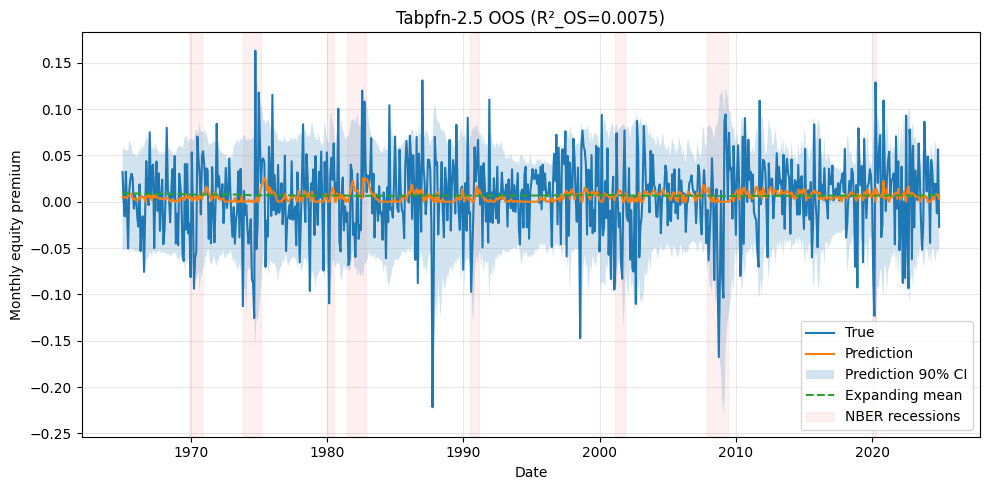

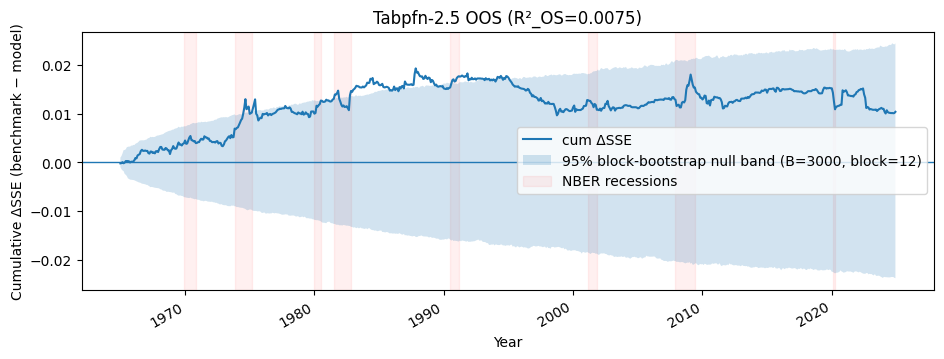

In [2]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("vp", "impvar", "vrp", "lzrt", 
    #"ogap", 
    "wtexas", 
    #"sntm", 
    "ndrbl", 
    "skvw", "tail", 
    #"fbm",
    "dtoy", "dtoat", "ygap", "rdsp", 
    #"rsvix", 
    #"tchi", 
    "avgcor", 
    #"shtint",
    "disag", "ntis", "tbl", "d/p", "d/y", 
    "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m", "equity_premium"),
    start_oos="1965-01-01",
    lag=1,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
                            )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

1965-01-01 00:00:00
0.8206896551724138
1965-02-01 00:00:00
0.8206896551724138
1965-03-01 00:00:00
0.8275862068965517
1965-04-01 00:00:00
0.8275862068965517
1965-05-01 00:00:00
0.8275862068965517
1965-06-01 00:00:00
0.8275862068965517
1965-07-01 00:00:00
0.8275862068965517
1965-08-01 00:00:00
0.8275862068965517
1965-09-01 00:00:00
0.8275862068965517
1965-10-01 00:00:00
0.8275862068965517
1965-11-01 00:00:00
0.8275862068965517
1965-12-01 00:00:00
0.8275862068965517
1966-01-01 00:00:00
0.8275862068965517
1966-02-01 00:00:00
0.8275862068965517
1966-03-01 00:00:00
0.8275862068965517
1966-04-01 00:00:00
0.8275862068965517
1966-05-01 00:00:00
0.8275862068965517
1966-06-01 00:00:00
0.8275862068965517
1966-07-01 00:00:00
0.8275862068965517
1966-08-01 00:00:00
0.8275862068965517
1966-09-01 00:00:00
0.8275862068965517
1966-10-01 00:00:00
0.8275862068965517
1966-11-01 00:00:00
0.8275862068965517
1966-12-01 00:00:00
0.8275862068965517
1967-01-01 00:00:00
0.8275862068965517
1967-02-01 00:00:00
0.827

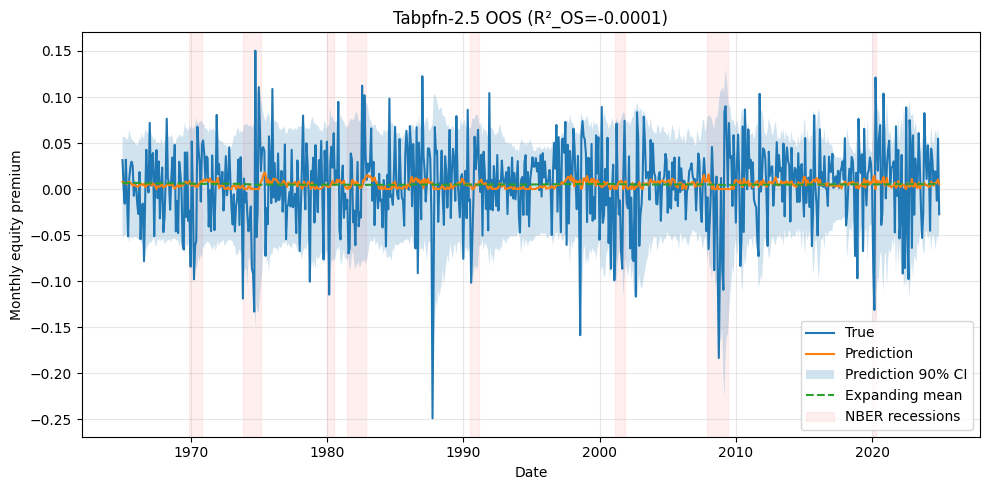

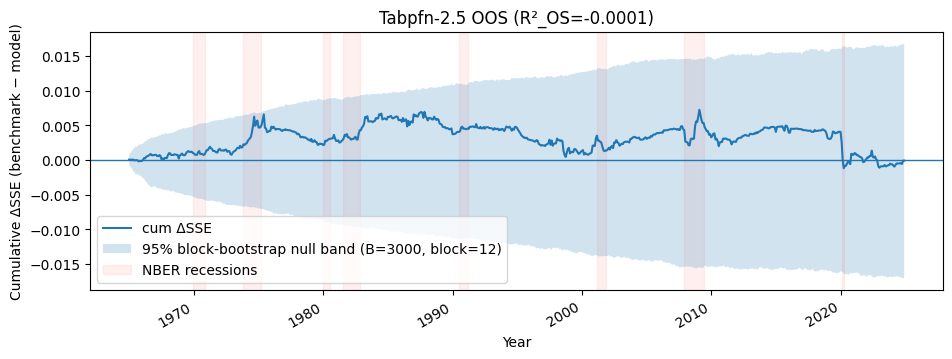

In [6]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("vp", "impvar", "vrp", "lzrt", 
    #"ogap", 
    "wtexas", 
    #"sntm", 
    "ndrbl", 
    "skvw", "tail", 
    #"fbm",
    "dtoy", "dtoat", "ygap", "rdsp", 
    #"rsvix", 
    #"tchi", 
    "avgcor", 
    #"shtint",
    "disag", "ntis", "tbl", "d/p", "d/y", 
    "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m", "equity_premium"),
    start_oos="1965-01-01",
    lag=5,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)



In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("vp", "impvar", "vrp", "lzrt", 
    #"ogap", 
    "wtexas", 
    #"sntm", 
    "ndrbl", 
    "skvw", "tail", 
    #"fbm",
    "dtoy", "dtoat", "ygap", "rdsp", 
    #"rsvix", 
    #"tchi", 
    "avgcor", 
    #"shtint",
    "disag", "ntis", "tbl", "d/p", "d/y", 
    "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m", "equity_premium"),
    start_oos="1965-01-01",
    lag = 3,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)



In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("equity_premium",),
    start_oos="1965-01-01",
    lag=100,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("vp", "impvar", "vrp", "lzrt", 
    #"ogap", 
    "wtexas", 
    #"sntm", 
    "ndrbl", 
    "skvw", "tail", 
    #"fbm",
    "dtoy", "dtoat", "ygap", "rdsp", 
    #"rsvix", 
    #"tchi", 
    "avgcor", 
    #"shtint",
    "disag", "ntis", "tbl", "d/p", "d/y", 
    "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m", "equity_premium"),
    start_oos="1965-01-01",
    lag=8,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)



c:\Users\kilia\Masterarbeit\source\regression_models.py:684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{v}_lag{L}"] = df[v].shift(L)
c:\Users\kilia\Masterarbeit\source\regression_models.py:684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{v}_lag{L}"] = df[v].shift(L)
c:\Users\kilia\Masterarbeit\source\regression_models.py:684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

1965-01-01 00:00:00
0.8103448275862069
1965-02-01 00:00:00
0.8103448275862069
1965-03-01 00:00:00
0.8146551724137931
1965-04-01 00:00:00
0.8189655172413793
1965-05-01 00:00:00
0.8232758620689655
1965-06-01 00:00:00
0.8232758620689655
1965-07-01 00:00:00
0.8275862068965517
1965-08-01 00:00:00
0.8275862068965517
1965-09-01 00:00:00
0.8275862068965517
1965-10-01 00:00:00
0.8275862068965517
1965-11-01 00:00:00
0.8275862068965517
1965-12-01 00:00:00
0.8275862068965517
1966-01-01 00:00:00
0.8275862068965517
1966-02-01 00:00:00
0.8275862068965517
1966-03-01 00:00:00
0.8275862068965517
1966-04-01 00:00:00
0.8275862068965517
1966-05-01 00:00:00
0.8275862068965517
1966-06-01 00:00:00
0.8275862068965517
1966-07-01 00:00:00
0.8275862068965517
1966-08-01 00:00:00
0.8275862068965517
1966-09-01 00:00:00
0.8275862068965517
1966-10-01 00:00:00
0.8275862068965517
1966-11-01 00:00:00
0.8275862068965517
1966-12-01 00:00:00
0.8275862068965517
1967-01-01 00:00:00
0.8275862068965517
1967-02-01 00:00:00
0.827